





### KNN with [sklearn](https://scikit-learn.org/) and [Social Network Ads dataset](https://github.com/shivang98/Social-Network-ads-Boost/blob/master/Social_Network_Ads.csv)

Example taken from _[KNN in Python](https://towardsdatascience.com/knn-in-python-835643e2fb53)_
    
@[Towards Datascience](https://towardsdatascience.com)

### Imports

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

from matplotlib.colors import ListedColormap

### Import Dataset

In [7]:

# Importing the dataset
fileName = 'file/social-network-ads.csv'
dataset = pd.read_csv(fileName)

# 1st 02 columns are: ID & the Gender (we don’t wanna take'em in consideration)
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Train

In [12]:

# Adjusting scale of features (salary and age are too discrepant values)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train (i.e: fitting classifier to the Training set)
classifier = KNeighborsClassifier(n_neighbors = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

### Test

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

### Visualize results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


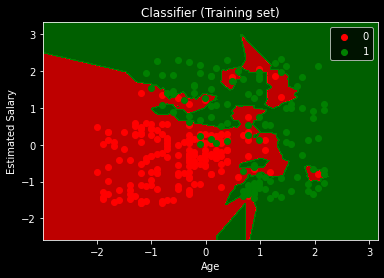

In [13]:
'''
- For each pixel we make a prediction;
- We color that pixel with the color associated to the predicted class;
- Here we have 02 classes (red for 00 & green for 01);
- Between lines 10 and 12 a we loop over all the training data points;
- We predict the label for them and color them (red or green);
'''

# Create rectangular grid out of of X1 & X2
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))


# Draw filled contours (we use it to fill the background with the color of the associated class)
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

# Draw sample dots colored as red or green
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

# The end
plt.title('Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()